# Sales

## Extract-Transform-Load

**Team 2**
- Ana Zeledon
- Diana Prescura
- Katelin Catton
- Natalia Boiko 

# KATELIN STARTS FROM HERE

## Data Extraction

Source of the data: https://www.kaggle.com/datasets/ruchi798/shopping-cart-database.

## Data Transformation

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


In [2]:
#warnings.simplefilter(action="ignore", category=FutureWarning)
#warnings.simplefilter(action="ignore", category=Warning)
#InteractiveShell.ast_node_interactivity = 'all'

#%reload_ext autoreload
#%autoreload 2
#%matplotlib inline

#def set_seed(seed=42):
    #np.random.seed(seed)
    #os.environ["PYTHONHASHSEED"] = str(seed)
#set_seed()

#pd.set_option("display.width", 100)
#pd.set_option("display.max_columns", 50)
#pd.set_option("display.max_rows", 30)

## Read CSV Files

In [3]:
customers = pd.read_csv('../Data/customers.csv')
orders = pd.read_csv('../Data/orders.csv')
products = pd.read_csv('../Data/products.csv')
sales = pd.read_csv('../Data/sales.csv')

In [4]:
customers.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [5]:
orders.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


In [6]:
products.head()

,product_id,product_type,product_name,size,colour,price,quantity
0,0,Shirt,Oxford Cloth,XS,red,114,66
1,1,Shirt,Oxford Cloth,S,red,114,53
2,2,Shirt,Oxford Cloth,M,red,114,54
3,3,Shirt,Oxford Cloth,L,red,114,69
4,4,Shirt,Oxford Cloth,XL,red,114,47


In [7]:
# Delete unnecessary columns: description column in products.csv file

# Delete the "description" column
#products.drop("description", axis=1, inplace=True)

# Save the modified DataFrame back to the CSV file
#products.to_csv("Data/products.csv", index=False)

In [8]:
sales.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212
1,1,1,481,118,1,118
2,2,1,2,96,3,288
3,3,1,1002,106,2,212
4,4,1,691,113,3,339


## Merge Data

In [9]:
co_data = pd.merge(left=customers, right=orders, 
                      left_index=True, right_index=True) 
customers_merged = pd.merge(left=co_data, right=products, 
                    left_index=True, right_index=True)

In [10]:
customers_merged

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,...,payment,order_date,delivery_date,product_id,product_type,product_name,size,colour,price,quantity
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,...,30811,2021-8-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,...,50490,2021-2-3,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,3,...,46763,2021-10-8,2021-11-03,2,Shirt,Oxford Cloth,M,red,114,54
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,4,...,39782,2021-5-6,2021-05-19,3,Shirt,Oxford Cloth,L,red,114,69
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,5,...,14719,2021-3-23,2021-03-24,4,Shirt,Oxford Cloth,XL,red,114,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Elvira Sarfati,Agender,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania,Australia,996,...,37843,2021-1-13,2021-02-02,995,Trousers,Wool,XS,green,111,73
996,997,Dickie Grushin,Non-binary,30,04 Howell PassSuite 209,6950,Ellaborough,Tasmania,Australia,997,...,53831,2021-1-18,2021-01-31,996,Trousers,Wool,S,green,111,43
997,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,998,...,53308,2021-5-5,2021-05-21,997,Trousers,Wool,M,green,111,41
998,999,Carita Vynarde,Polygender,30,170 Wilson AvenueApt. 577,7849,East Oscarfurt,Western Australia,Australia,999,...,31643,2021-6-15,2021-07-12,998,Trousers,Wool,L,green,111,42


In [11]:
customers_merged.isnull().sum()

customer_id_x    0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
order_id         0
customer_id_y    0
payment          0
order_date       0
delivery_date    0
product_id       0
product_type     0
product_name     0
size             0
colour           0
price            0
quantity         0
dtype: int64

In [12]:
sales.isnull().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

In [13]:
customers_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id_x  1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   gender         1000 non-null   object
 3   age            1000 non-null   int64 
 4   home_address   1000 non-null   object
 5   zip_code       1000 non-null   int64 
 6   city           1000 non-null   object
 7   state          1000 non-null   object
 8   country        1000 non-null   object
 9   order_id       1000 non-null   int64 
 10  customer_id_y  1000 non-null   int64 
 11  payment        1000 non-null   int64 
 12  order_date     1000 non-null   object
 13  delivery_date  1000 non-null   object
 14  product_id     1000 non-null   int64 
 15  product_type   1000 non-null   object
 16  product_name   1000 non-null   object
 17  size           1000 non-null   object
 18  colour         1000 non-null 

In [14]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sales_id        5000 non-null   int64
 1   order_id        5000 non-null   int64
 2   product_id      5000 non-null   int64
 3   price_per_unit  5000 non-null   int64
 4   quantity        5000 non-null   int64
 5   total_price     5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


In [15]:
#Find categorical variables

categorical = customers_merged.select_dtypes(["category", "object"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {customers_merged[cat_col].nunique()}")

customer_name : 1000
gender : 8
home_address : 1000
city : 961
state : 8
country : 1
order_date : 291
delivery_date : 305
product_type : 3
product_name : 28
size : 5
colour : 7


In [16]:
#Find numeric variables

numeric = customers_merged.select_dtypes(["int", "float"]).columns
for num_col in numeric:
    print(f"{num_col} : {customers_merged[num_col].nunique()}")

customer_id_x : 1000
age : 61
zip_code : 955
order_id : 1000
customer_id_y : 617
payment : 995
product_id : 1000
price : 21
quantity : 41


In [17]:
# Find Outliers

# Select the columns with numerical data
num_cols = ['price', 'quantity']

# Calculate the IQR for each column
Q1 = customers_merged[num_cols].quantile(0.25)
Q3 = customers_merged[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
outlier_upper_bound = Q3 + 1.5 * IQR
outlier_lower_bound = Q1 - 1.5 * IQR

# Identify outliers in each column
outliers = {}
for col in num_cols:
    outliers[col] = customers_merged[(customers_merged[col] < outlier_lower_bound[col]) | (customers_merged[col] > outlier_upper_bound[col])]
    print(f"Number of outliers in '{col}': {len(outliers[col])}")


Number of outliers in 'price': 0
Number of outliers in 'quantity': 0


<AxesSubplot: >

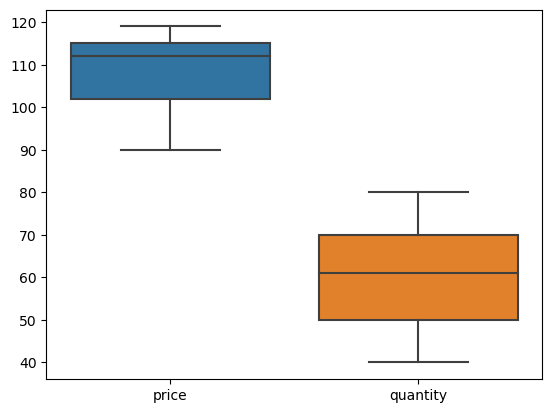

In [18]:
# Select the columns with numerical data
num_cols = ['price', 'quantity']

# Convert the data type of the 'age' column to float
customers_merged['age'] = customers_merged['age'].astype(float)

# Create a box plot for the selected columns
sns.boxplot(data=customers_merged[num_cols])

In [19]:
# Select the columns with numerical data
num_cols = ['price_per_unit', 'quantity', 'total_price']

# Calculate the IQR for each column
Q1 = sales[num_cols].quantile(0.25)
Q3 = sales[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
outlier_upper_bound = Q3 + 1.5 * IQR
outlier_lower_bound = Q1 - 1.5 * IQR

# Identify outliers in each column
outliers = {}
for col in num_cols:
    outliers[col] = sales[(sales[col] < outlier_lower_bound[col]) | (sales[col] > outlier_upper_bound[col])]
    print(f"Number of outliers in '{col}': {len(outliers[col])}")


Number of outliers in 'price_per_unit': 0
Number of outliers in 'quantity': 0
Number of outliers in 'total_price': 0


<Figure size 800x600 with 0 Axes>

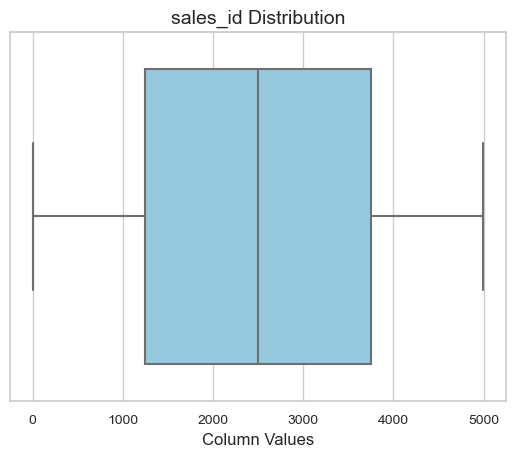

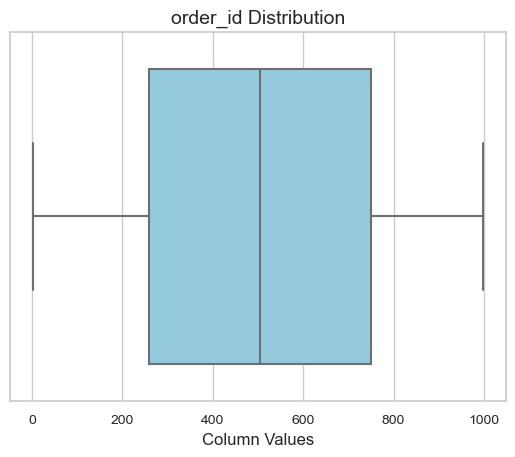

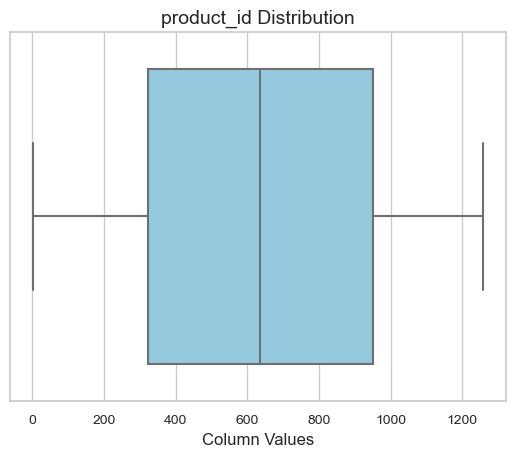

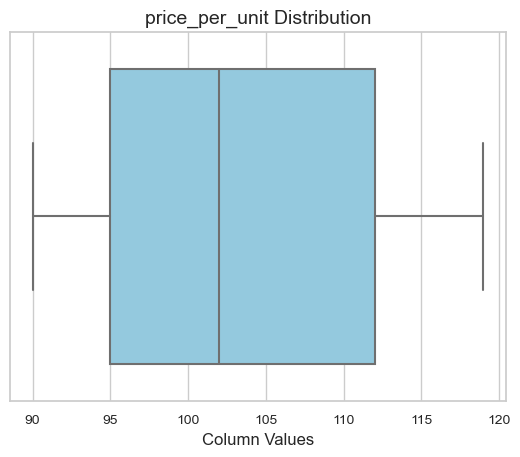

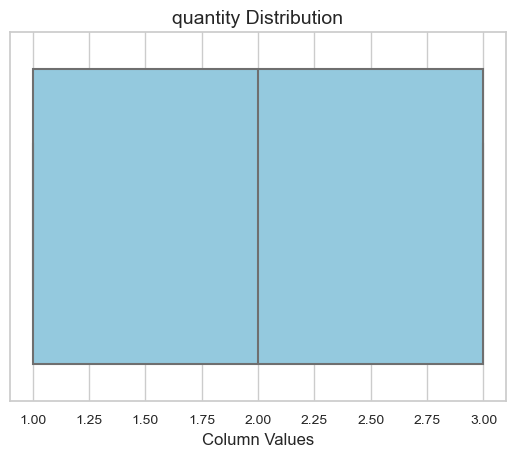

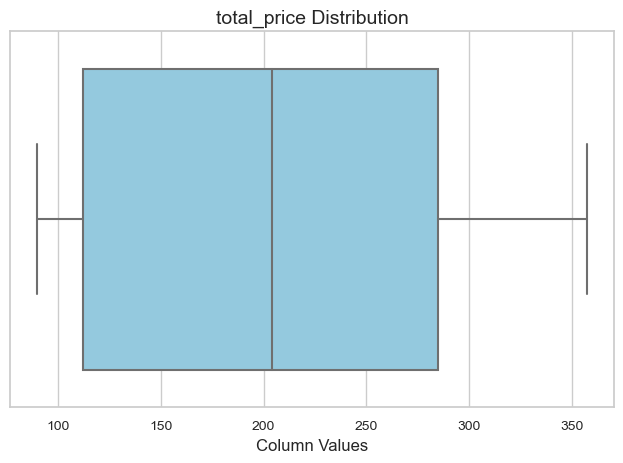

In [20]:
# Set figure size and style
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")

# Create a boxplot for each numeric column to identify outliers
for col in sales.select_dtypes(include=['int64', 'float64']).columns:
    fig, ax = plt.subplots()
    sns.boxplot(x=sales[col], color='skyblue')
    ax.set_title(f"{col} Distribution", fontsize=14)
    ax.set_xlabel("Column Values", fontsize=12)
    ax.tick_params(labelsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [21]:
# Check for inconsistent data in the 'gender' column
unique_values = customers_merged['gender'].unique()
print("Unique values in 'gender' column: ", unique_values)

# Check for any inconsistent values in 'gender' column
inconsistent_values = [val for val in customers_merged['gender'] if val not in unique_values]
if len(inconsistent_values) > 0:
    print("Inconsistent values in 'gender' column: ", inconsistent_values)
else:
    print("No inconsistent values found in 'gender' column.")

Unique values in 'gender' column:  ['Female' 'Genderfluid' 'Polygender' 'Bigender' 'Agender' 'Male'
 'Genderqueer' 'Non-binary']
No inconsistent values found in 'gender' column.


In [22]:
# Detecting inconsistent data entry for age column
age_stats = customers_merged['age'].describe()
age_range = age_stats['max'] - age_stats['min']
age_q1, age_q3 = np.percentile(customers_merged['age'], [25, 75])
age_iqr = age_q3 - age_q1
age_upper_bound = age_q3 + 1.5 * age_iqr
age_lower_bound = age_q1 - 1.5 * age_iqr

# Identifying rows with inconsistent age values
inconsistent_age_rows = customers_merged[(customers_merged['age'] < age_lower_bound) | (customers_merged['age'] > age_upper_bound)]

# Printing out the number of rows with inconsistent age values
print(f"Number of rows with inconsistent age values: {len(inconsistent_age_rows)}")

Number of rows with inconsistent age values: 0


In [23]:
#Find numeric variables

numeric = customers_merged.select_dtypes(["int", "float"]).columns
for num_col in numeric:
    print(f"{num_col} : {customers_merged[num_col].nunique()}")


customer_id_x : 1000
age : 61
zip_code : 955
order_id : 1000
customer_id_y : 617
payment : 995
product_id : 1000
price : 21
quantity : 41


In [24]:
#Find categorical variables

categorical = customers_merged.select_dtypes(["category", "object"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {customers_merged[cat_col].nunique()}")

customer_name : 1000
gender : 8
home_address : 1000
city : 961
state : 8
country : 1
order_date : 291
delivery_date : 305
product_type : 3
product_name : 28
size : 5
colour : 7


# DIANA STARTS FROM HERE

In [25]:
customers_merged.loc[:, ['age','payment', 'price', 'quantity']].describe()

,age,payment,price,quantity
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.860000,33972.936000,108.095000,60.371000
std,17.647828,14451.609047,9.158048,11.606812
min,20.000000,10043.000000,90.000000,40.000000
25%,34.000000,21329.250000,102.000000,50.000000
50%,50.000000,33697.500000,112.000000,61.000000
75%,65.000000,46249.000000,115.000000,70.000000
max,80.000000,59910.000000,119.000000,80.000000


In [26]:
# Create sales column
customers_merged["sales"] = customers_merged["price"] * customers_merged["quantity"] 

In [27]:
customers_merged['order_date'] = pd.to_datetime(customers_merged['order_date'])

In [28]:
# Create Year Column
customers_merged['year_order'] = customers_merged['order_date'].dt.year

# Create Month Column
customers_merged['month_order'] = customers_merged['order_date'].dt.month

# Create Day Column
customers_merged["day_order"] = customers_merged["order_date"].dt.day

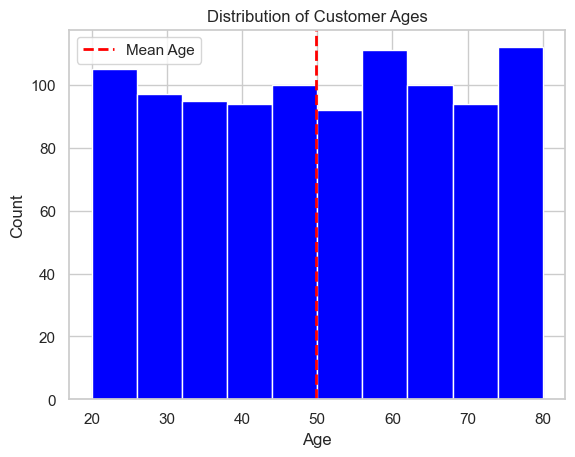

In [29]:
# What is the distribution of customer ages in the data set?

mean_age = customers['age'].mean()

plt.hist(customers_merged['age'], bins=10, color='blue')
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label='Mean Age')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

In [30]:
# What is the range of order dates in the sales data set?

min_date = customers_merged['order_date'].min()
max_date = customers_merged['order_date'].max()

print("Range of order dates in sales data set: {}-{}".format(min_date, max_date))

Range of order dates in sales data set: 2021-01-01 00:00:00-2021-10-24 00:00:00


C:\Users\valer\AppData\Local\Temp\ipykernel_18340\622892079.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(


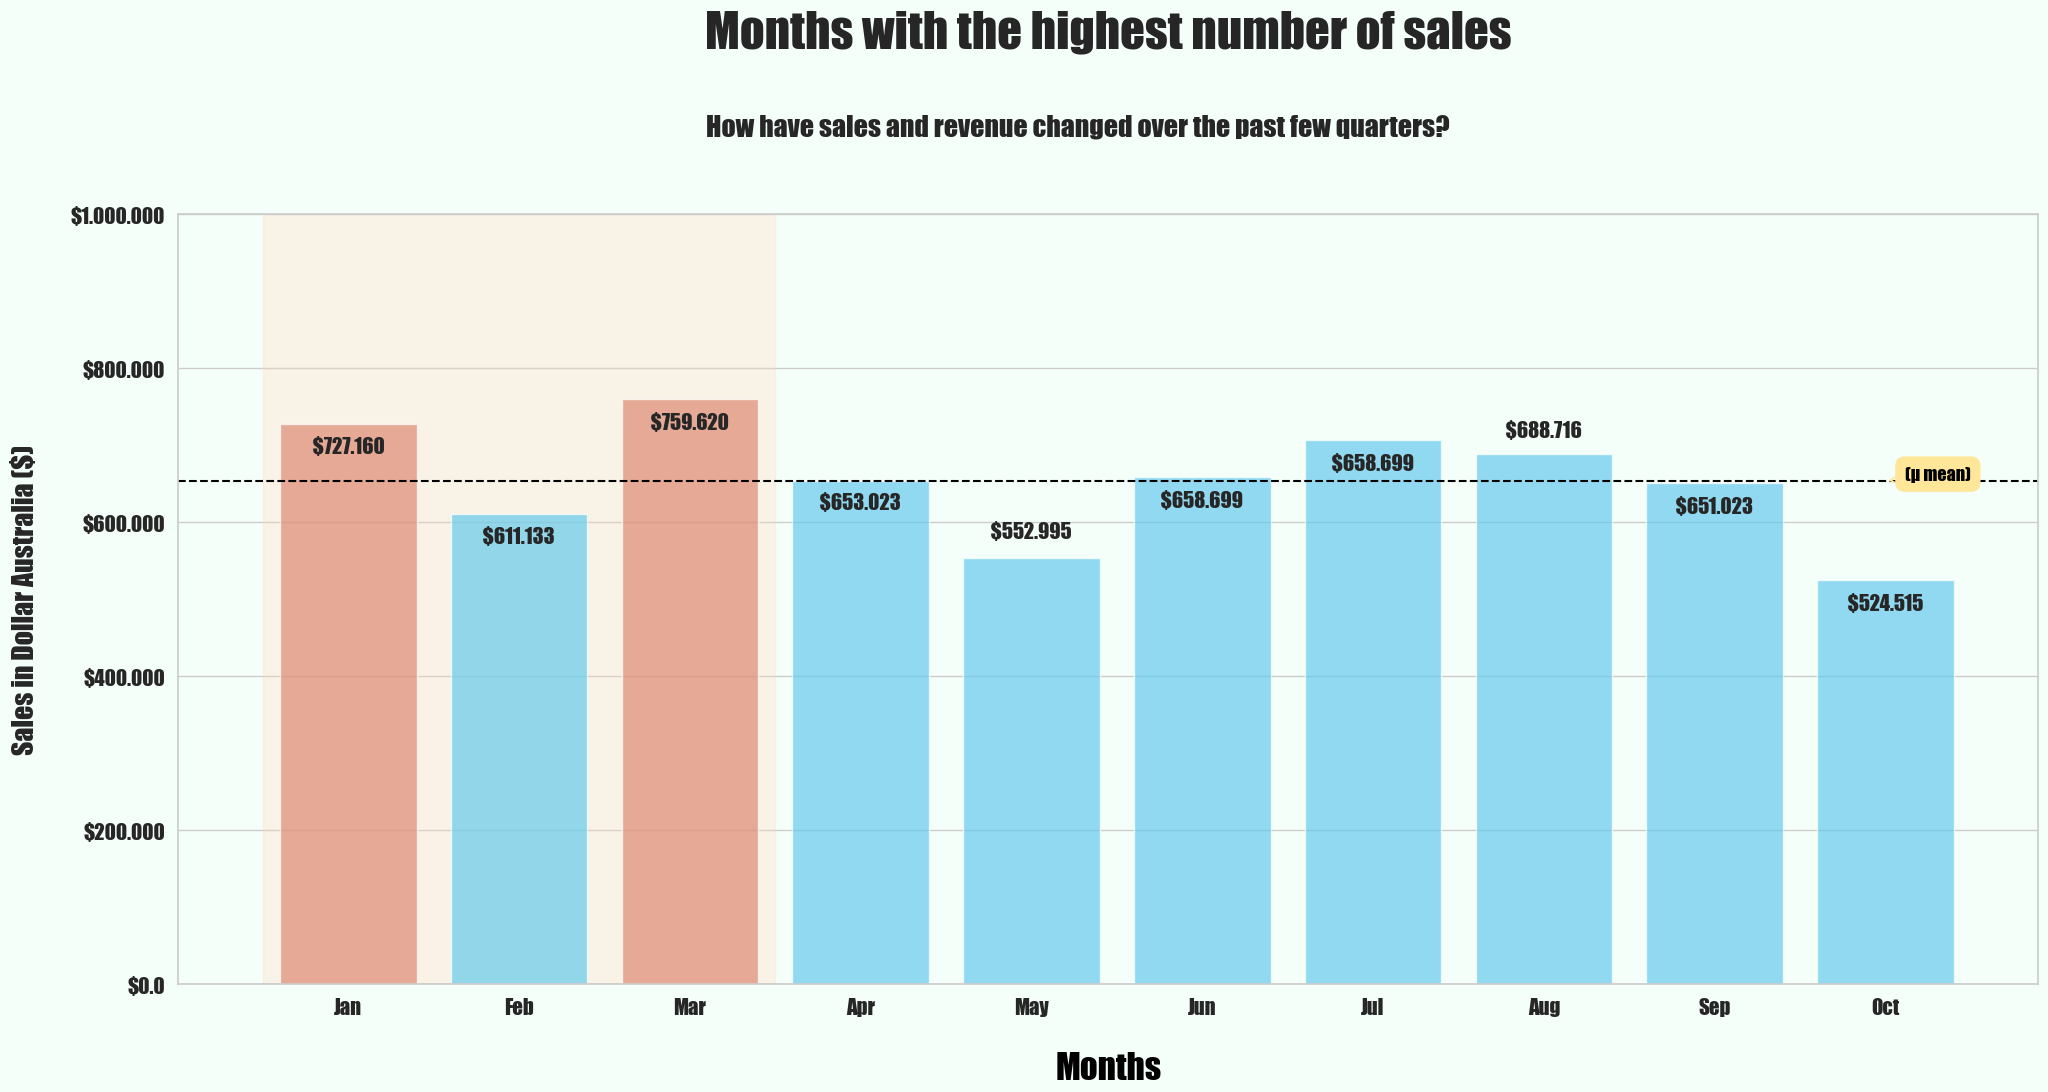

In [31]:
# set-up
color_map = ["#5FCDF5" for _ in range(20)]
color_map[0] = "#E3866F"
color_map[2] = "#E3866F"
sns.set_palette(sns.color_palette(color_map))
span_range = [-0.5, 2.5]

# group the Month cols
sum_month_order = customers_merged.groupby(["month_order"]).sum().astype("int")

# let's plot it
fig, ax = plt.subplots(
    1, 1, 
    figsize=(24, 10), 
    facecolor="mintcream")

# makes bar plot 
sns.barplot(
    x=sum_month_order.index,
    y=sum_month_order["sales"], 
    data=sum_month_order,
    zorder=2,
    palette=color_map,
    saturation=.9,
    alpha=.7,
    ax=ax) 

# title 
ax.set_title(
    "Months with the highest number of sales", 
    fontname="fantasy", 
    weight="bold", 
    fontsize=35, 
    pad=120)

plt.suptitle(
    "How have sales and revenue changed over the past few quarters?", 
    fontname="fantasy",
    weight="bold",
    fontsize=20)

# labels
ax.set_xlabel( 
    "Months", 
    weight="bold", 
    color="black",
    family="fantasy",
    fontsize=25, 
    loc="center",
    labelpad=25)
ax.set_ylabel(
    "Sales in Dollar Australia ($)", 
    weight="bold", 
    family="fantasy",
    fontsize=20,
    labelpad=25)

# ticklabels
ax.set_xticklabels( 
    labels=["Jan", "Feb", "Mar", "Apr", "May", 
            "Jun", "Jul", "Aug", "Sep", "Oct"],
    weight="bold", 
    family="fantasy",
    fontsize=15)
ax.set_yticklabels( 
    labels=["$0.0", "$200.000", "$400.000", 
            "$600.000", "$800.000", "$1.000.000"],
    weight="bold",
    family="fantasy",
    fontsize=15)

# y-limit
ax.set_ylim(0, 1000000)

# face-color
ax.set_facecolor("mintcream")

# text 
ax.text(0, 765000-66000, " $727.160 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(1, 648500-66000, " $611.133 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(2, 797200-66000, " $759.620 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(3, 693000-66000, " $653.023 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(4, 589000, " $552.995 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(5, 696000-66000, " $658.699 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(6, 743000-66000, " $658.699 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(7, 719900, " $688.716 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(8, 688000-66000, " $651.023 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(9, 562000-66000, " $524.515 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

# annotate
ax.annotate("(μ mean)", xy=(9, sum_month_order["sales"].mean()), 
             xytext=(9.5, sum_month_order["sales"].mean() + 9000),
             size=13, ha='right', va="center", color="black", 
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

# axv-span
ax.axvspan(
    span_range[0], 
    span_range[1], 
    color="peachpuff", 
    alpha=0.3)

# axh-line
ax.axhline(
    y=sum_month_order["sales"].mean(), 
    color="black", 
    ls="--", 
    lw=1.5);

In [32]:
### set-up
labels = ["0-30yo", "31-40yo", "41-50yo", "51-60yo", "61-70yo", "71-80yo"]
bins= [30, 31, 41, 51, 61, 71, 80]
customers_merged["age_group"] = pd.cut(customers_merged["age"], bins=bins, labels=labels, right=False)
sum_total_age = [660,  5652,  7382,  9209, 10890, 10883]
sum_age_group = pd.DataFrame({"age": labels, "sum_total_age": sum_total_age})
color_map = ["#5FCDF5" for _ in range(6)]
color_map[5] = "#E3866F"
color_map[4] = "#E3866F"
sns.set_palette(sns.color_palette(color_map))
span_range = [3.5, 5.5]
span_range2 = [[-0.15, 0.14], 
               [0.85, 1.14], 
               [1.85, 2.14], 
               [2.85, 3.14], 
               [3.85, 4.14], 
               [4.85, 5.14]]

C:\Users\valer\AppData\Local\Temp\ipykernel_18340\1299339214.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\valer\AppData\Local\Temp\ipykernel_18340\1299339214.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(
C:\Users\valer\AppData\Local\Temp\ipykernel_18340\1299339214.py:85: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=None, which="major", axis="x")


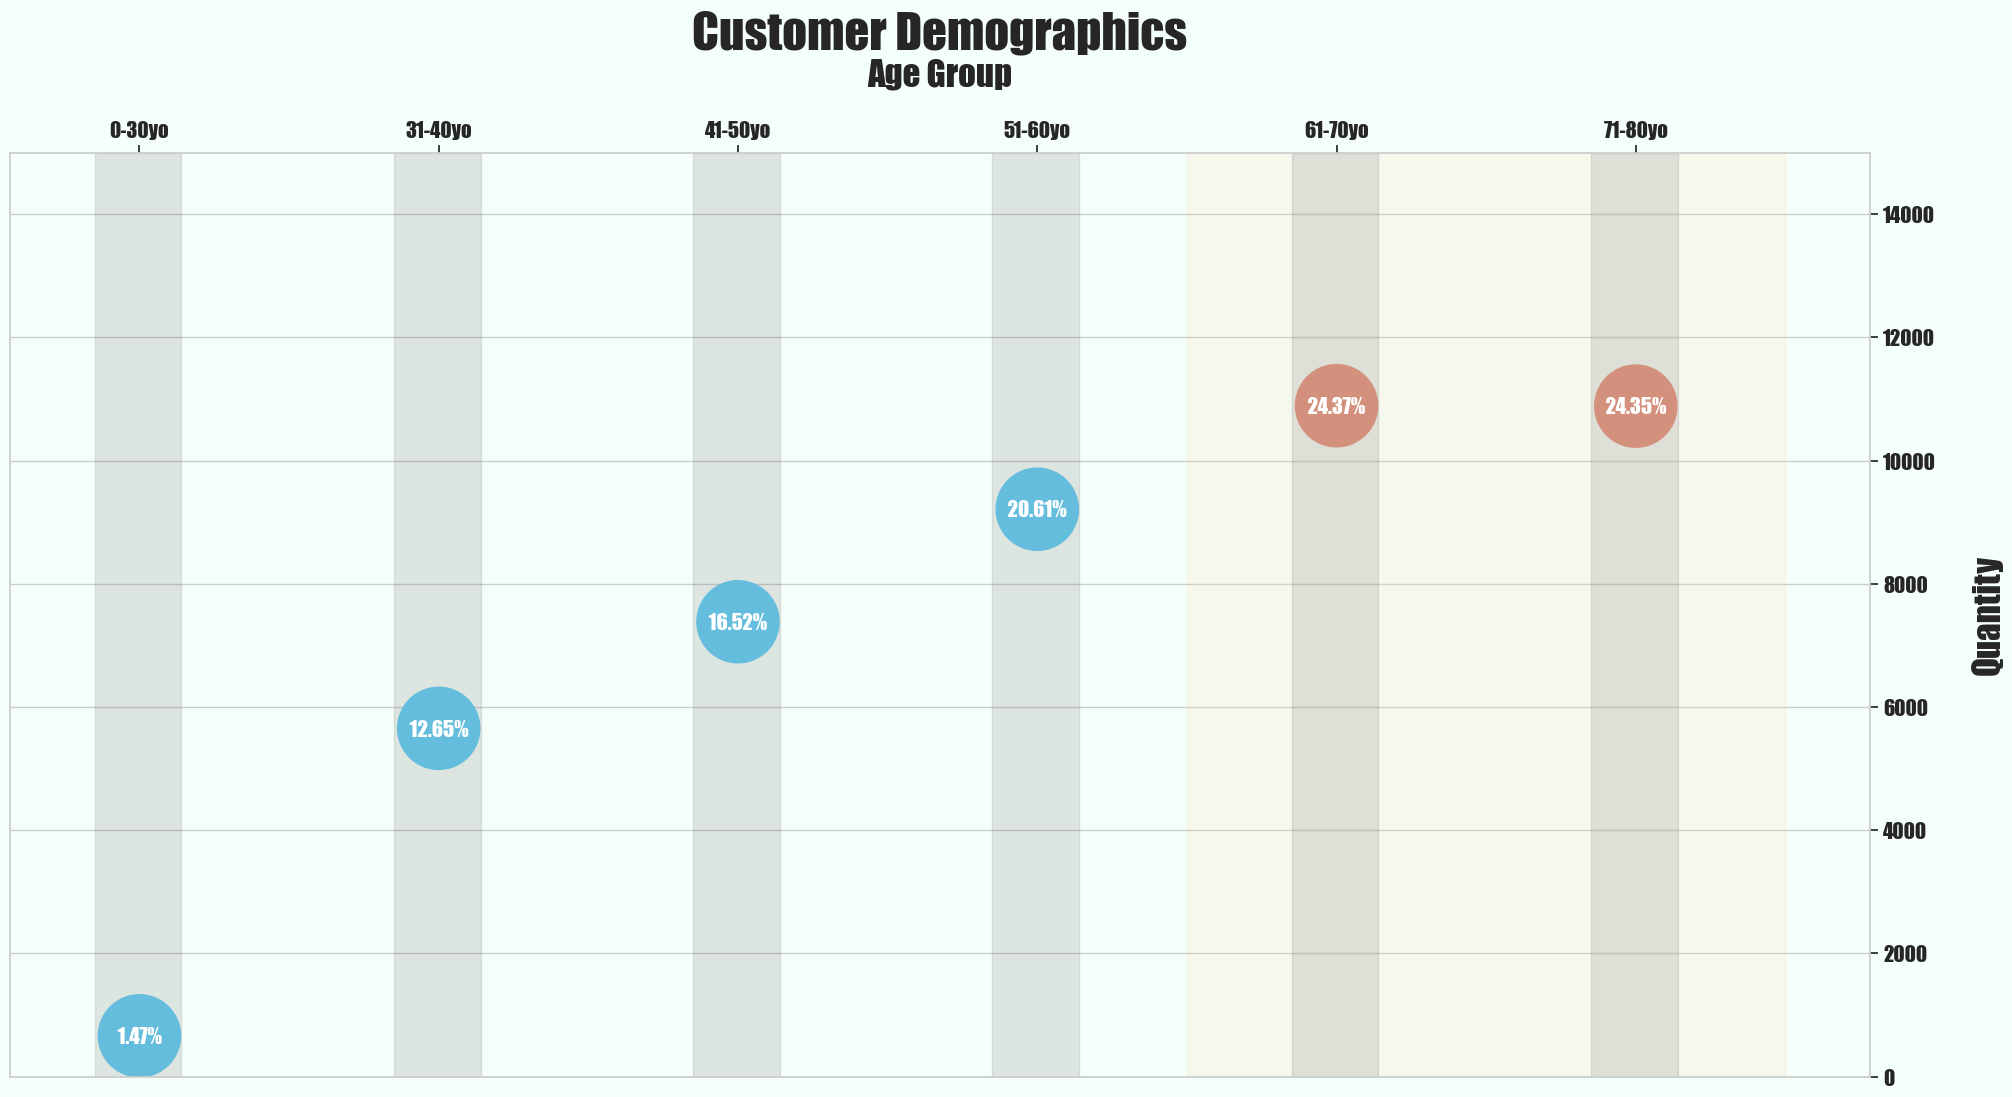

In [33]:
# subplots
fig, ax = plt.subplots(
    1, 1, 
    figsize=(24, 12), 
    facecolor=("mintcream"))

# countplot
ax.scatter(
    sum_age_group["age"], 
    sum_age_group["sum_total_age"], 
    color=color_map,
    s=3500,
    zorder=1)

# title
ax.set_title(
    "Customer Demographics", 
    fontname="fantasy",
    weight="bold",
    fontsize=35,
    pad=75)

# axv-span
ax.axvspan(span_range[0], span_range[1], color="peachpuff", alpha=0.2)
ax.axvspan(span_range2[0][0], span_range2[0][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[1][0], span_range2[1][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[2][0], span_range2[2][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[3][0], span_range2[3][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[4][0], span_range2[4][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[5][0], span_range2[5][1], color="gray", alpha=0.2)
# labels
ax.set_xlabel(
    "Age Group", 
    weight="bold", 
    family="fantasy", 
    fontsize=25,
    labelpad=25)
ax.set_ylabel(
    "Quantity", 
    weight="bold", 
    family="fantasy", 
    fontsize=25,
    labelpad=25)

# ticklabels
ax.set_xticklabels(
    labels=labels, 
    weight="bold", 
    fontsize=15,
    family="fantasy")
ax.set_yticklabels(
    labels=list(np.arange(0, 16000, 2000)), 
    weight="bold", 
    fontsize=15,
    family="fantasy")

# text
ax.text(0, 660, " 1.47% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(1, 5652, " 12.65% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(2, 7382, " 16.52% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(3, 9209, " 20.61% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(4, 10890, " 24.37% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(5, 10883, " 24.35% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

# adjust ticks
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")

# y-limit
ax.set_ylim(0, 15000)

ax.grid(b=None, which="major", axis="x")

# face-color
ax.set_facecolor("mintcream");

C:\Users\valer\AppData\Local\Temp\ipykernel_18340\1014205532.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\valer\AppData\Local\Temp\ipykernel_18340\1014205532.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(


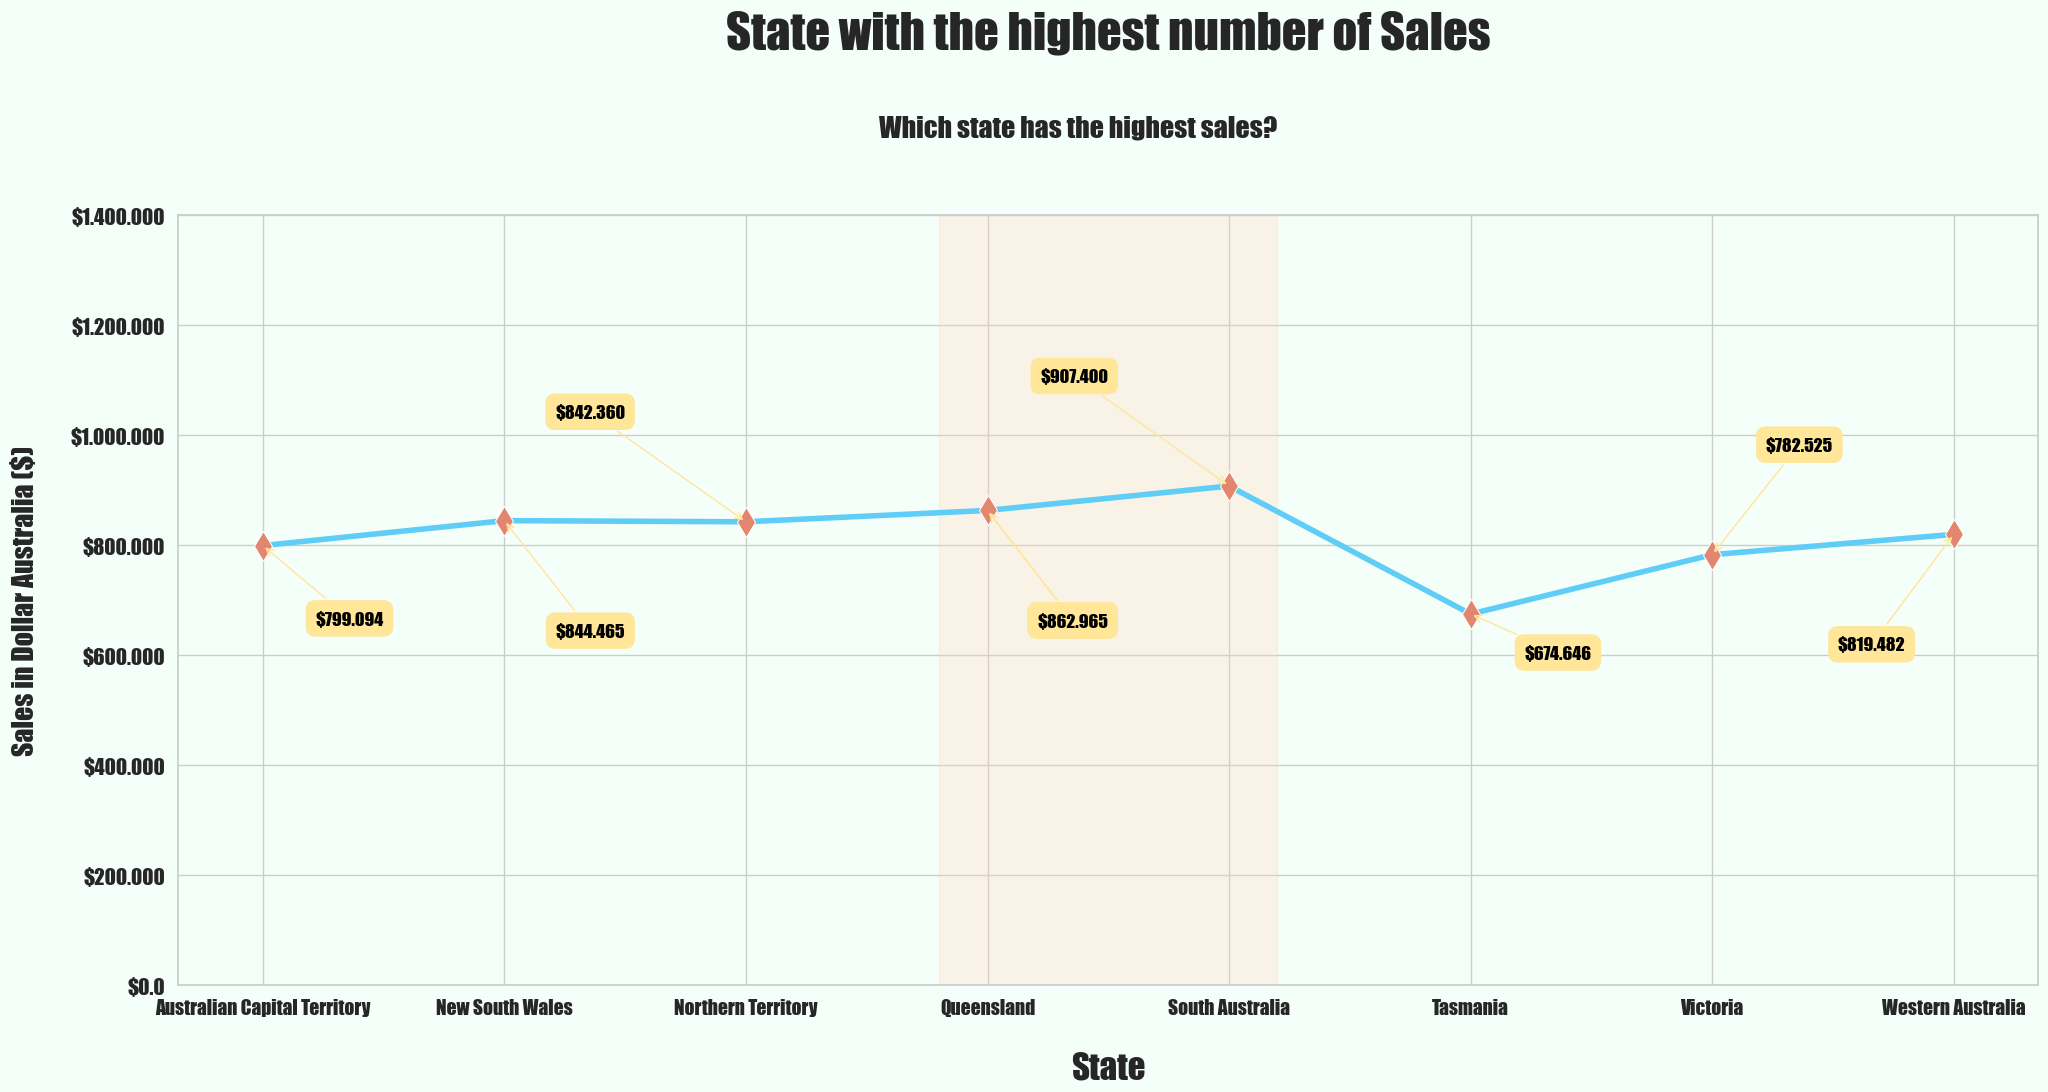

In [34]:
# set-up
color_map = ["#5FCDF5" for _ in range(8)]
color_map[4] = color_map[3] = "#E3866F"
sns.set_palette(sns.color_palette(color_map))
state = ['Australian Capital Territory', 'New South Wales', 'Northern Territory', 'Queensland',
         'South Australia', 'Tasmania', 'Victoria', 'Western Australia']
values = [799094, 844465, 842360, 862965, 907400, 674646, 782525, 819482]
state_sales = pd.DataFrame({"state": state, "values": values})
span_range = [2.8, 4.2]

# let's plot it
fig, ax = plt.subplots(
    1, 1,
    figsize=(24, 10),
    facecolor="mintcream")

# makes bar plot 
sns.lineplot(
    x=state_sales["state"],
    y=state_sales["values"],
    data=state_sales,
    marker="d",
    markersize=15,
    markerfacecolor="#E3866F",
    lw=4,
    color="#5FCDF5",
    ax=ax)

# title
ax.set_title( # title
    "State with the highest number of Sales", 
    fontname="fantasy",
    weight="bold",
    fontsize=35,
    pad=120)
plt.suptitle(
    "Which state has the highest sales?", 
    fontname="fantasy",
    weight="bold",
    fontsize=20)

# labels
ax.set_xlabel(
    "State", 
    family="fantasy",
    weight="bold",
    fontsize=25,
    loc="center",
    labelpad=25)
ax.set_ylabel( # y-label
    "Sales in Dollar Australia ($)", 
    family="fantasy",
    weight="bold",
    fontsize=20, 
    loc="center",
    labelpad=25)

# ticklabels
ax.set_xticklabels(
    labels=state_sales["state"],
    weight="bold", 
    fontsize=14, 
    family="fantasy",
    rotation=0)
ax.set_yticklabels(
    labels=["$0.0",     "$200.000",
            "$400.000", "$600.000",
            "$800.000", "$1.000.000",
            "$1.200.000", "$1.400.000"],
    weight="bold",
    family="fantasy",
    fontsize=15)

# annotate
ax.annotate("$799.094", xy=(0, 799094), xytext=(0.5, 666666),
             size=13, ha='right', va="center", color="black", 
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$844.465", xy=(1, 844465), xytext=(1.5, 644465),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$842.360", xy=(2, 842360), xytext=(1.5, 1042360),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$862.965", xy=(3, 862965), xytext=(3.5, 662965),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$862.965", xy=(3, 862965), xytext=(3.5, 662965),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$907.400", xy=(4, 907400), xytext=(3.5, 1107400),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$674.646", xy=(5, 674646), xytext=(5.5, 604646),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$782.525", xy=(6, 782525), xytext=(6.5, 982525),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$819.482", xy=(7, 819482), xytext=(6.8, 619482),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

# axv-span
ax.axvspan(span_range[0], 
           span_range[1], 
           color="peachpuff", 
           alpha=0.3)

# facecolor
ax.set_facecolor("mintcream")

# y-limits
ax.set_ylim(0, 1400000);


In [35]:
# What is the average price of the products?

average_price = customers_merged['price'].mean()
print("Average price of products in products data set: ${:.2f}".format(average_price))

Average price of products in products data set: $108.09


In [36]:
# What is the range of order dates in the sales data set?

min_date = customers_merged['order_date'].min()
max_date = customers_merged['order_date'].max()

print("Range of order dates in sales data set: {}-{}".format(min_date, max_date))

Range of order dates in sales data set: 2021-01-01 00:00:00-2021-10-24 00:00:00


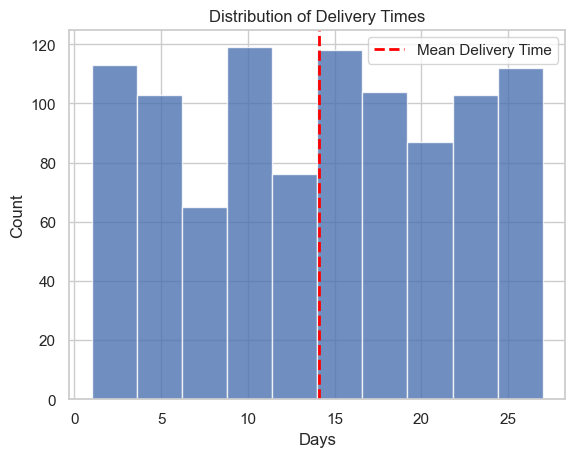

In [37]:
# What is the distribution of delivery times in the sales data set?

# Calculate delivery times and days
delivery_times = pd.to_datetime(customers_merged['delivery_date']) - pd.to_datetime(customers_merged['order_date'])
delivery_days = delivery_times.dt.days

# Calculate mean delivery time
mean_delivery_time = delivery_days.mean()

# Plot the histogram with vertical line for mean delivery time
plt.hist(delivery_days, bins=10, color='#4c72b0', alpha=0.8)
plt.axvline(mean_delivery_time, color='red', linestyle='--', linewidth=2, label='Mean Delivery Time')
plt.title('Distribution of Delivery Times')
plt.xlabel('Days')
plt.ylabel('Count')
plt.legend()
plt.show()

In [38]:
# What is the range of quantities sold in the sales data set?

min_quantity = sales['quantity'].min()
max_quantity = sales['quantity'].max()

print("Range of quantities sold in sales data set: {}-{}".format(min_quantity, max_quantity))

Range of quantities sold in sales data set: 1-3


In [39]:
# What is the total revenue generated by the sales data set?

total_revenue = sales['total_price'].sum()
print("Total revenue generated by the sales data set: ${:.2f}".format(total_revenue))

Total revenue generated by the sales data set: $1031800.00


In [40]:
# What is the most common product type in the product info data set?

most_common_product_type = customers_merged['product_type'].mode()[0]
print("Most common product type in the product info data set: ", most_common_product_type)

Most common product type in the product info data set:  Jacket


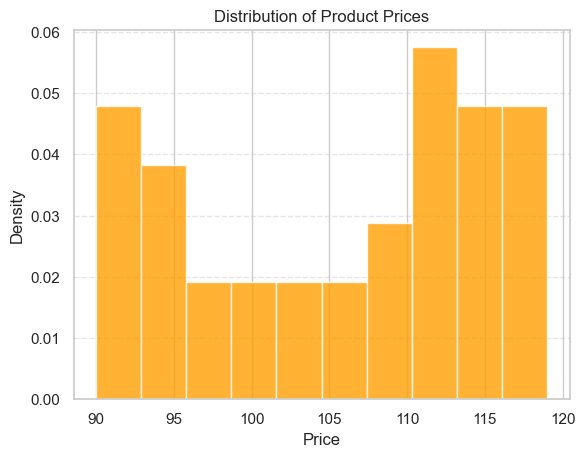

In [41]:
# What is the distribution of product prices in the product info data set?

# Plot the histogram with density curve and orange color scheme
plt.hist(products['price'], bins=10, density=True, color='#ff9f00', alpha=0.8)
plt.grid(True, axis='y', alpha=0.5, linestyle='--')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

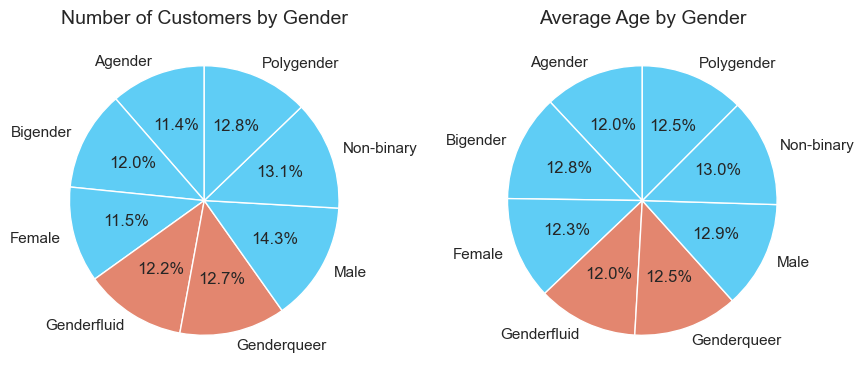

In [42]:
# Gender and age description

gender_grouped = customers_merged.groupby('gender')
gender_counts = gender_grouped.size()
gender_ages = gender_grouped['age'].mean()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Number of Customers by Gender', fontsize=14)

axs[1].pie(gender_ages.values, labels=gender_ages.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Average Age by Gender', fontsize=14)

plt.subplots_adjust(wspace=0.3)
plt.show()

In [43]:
# Count number of customers in each country
country_counts = customers_merged.groupby('country').size().sort_values(ascending=False)

# Calculate average age for customers in each country
country_ages = customers_merged.groupby('country')['age'].mean().sort_values(ascending=False)

# Calculate percentage of male and female customers in each country
gender_pct_by_country = pd.crosstab(index=customers['country'], columns=customers['gender'], normalize='index') * 100

print("Number of Customers by Country:")
print(country_counts)
print("\nAverage Age of Customers by Country:")
print(country_ages)
print("\nPercentage of Male and Female Customers by Country:")
print(gender_pct_by_country)

Number of Customers by Country:
country
Australia    1000
dtype: int64

Average Age of Customers by Country:
country
Australia    49.86
Name: age, dtype: float64

Percentage of Male and Female Customers by Country:
gender     Agender  Bigender  Female  Genderfluid  Genderqueer  Male  \
country                                                                
Australia     11.4      12.0    11.5         12.2         12.7  14.3   

gender     Non-binary  Polygender  
country                            
Australia        13.1        12.8  


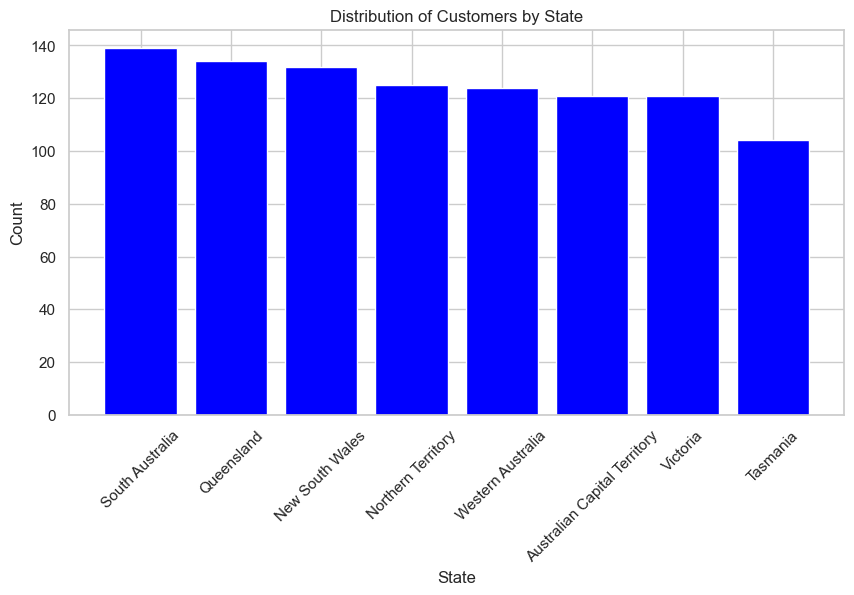

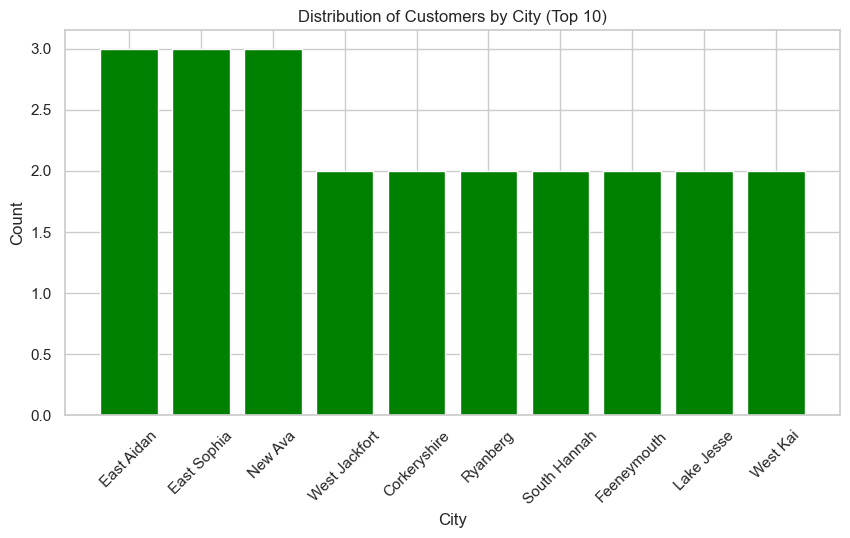

Number of Customers by Country:
country
Australia    1000
dtype: int64

Average Age of Customers by Country:
country
Australia    49.86
Name: age, dtype: float64

Percentage of Male and Female Customers by Country:
gender     Agender  Bigender  Female  Genderfluid  Genderqueer  Male  \
country                                                                
Australia     11.4      12.0    11.5         12.2         12.7  14.3   

gender     Non-binary  Polygender  
country                            
Australia        13.1        12.8  


In [44]:
# Count number of customers in each country
country_counts = customers_merged.groupby('country').size().sort_values(ascending=False)

# Calculate average age for customers in each country
country_ages = customers_merged.groupby('country')['age'].mean().sort_values(ascending=False)

# Calculate percentage of male and female customers in each country
gender_pct_by_country = pd.crosstab(index=customers_merged['country'], columns=customers_merged['gender'], normalize='index') * 100

# Distribution of customers by state
state_counts = customers_merged.groupby('state').size().sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.bar(state_counts.index, state_counts.values, color='blue')
plt.title('Distribution of Customers by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of customers by city
city_counts = customers_merged.groupby('city').size().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,5))
plt.bar(city_counts.index, city_counts.values, color='green')
plt.title('Distribution of Customers by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("Number of Customers by Country:")
print(country_counts)
print("\nAverage Age of Customers by Country:")
print(country_ages)
print("\nPercentage of Male and Female Customers by Country:")
print(gender_pct_by_country)

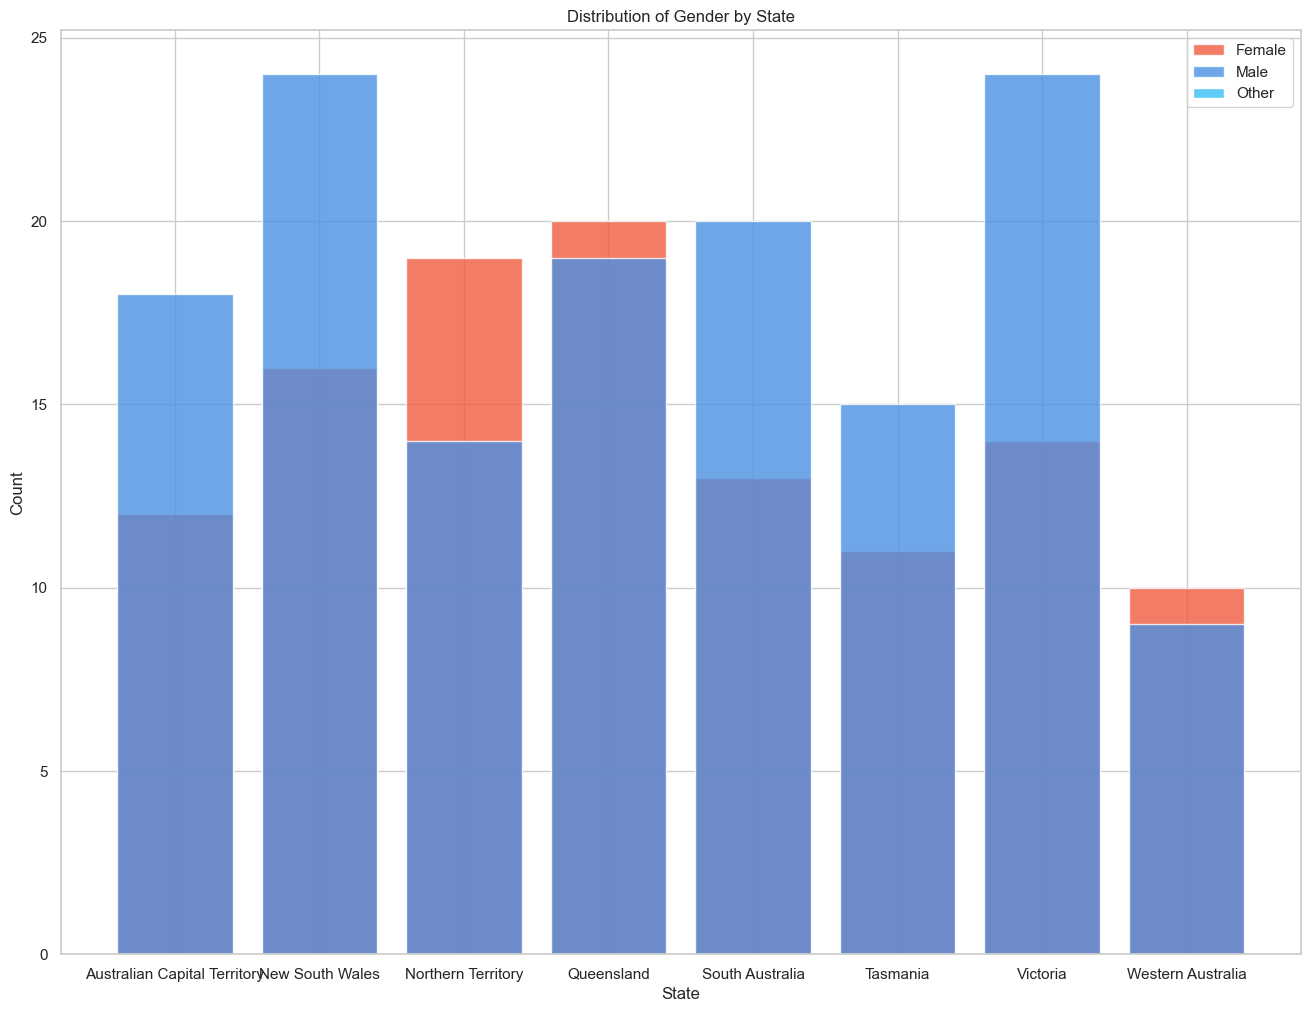

In [45]:
import matplotlib.pyplot as plt

# group customers by state and gender, and count the number of occurrences
state_gender_counts = customers_merged.groupby(['state', 'gender'])['customer_id_x'].count().reset_index()
state_gender_counts.columns = ['state', 'gender', 'count']

# plot the bar chart
fig, ax = plt.subplots(figsize=(16, 12))
for i, g in enumerate(['Female', 'Male', 'Other']):
    gender_counts = state_gender_counts[state_gender_counts['gender'] == g]
    ax.bar(gender_counts['state'], gender_counts['count'], label=g, alpha=0.8, color=['#F15B40', '#4A90E2', '#60BD68'][i])

# add labels and legend
ax.set_xlabel('State')
ax.set_ylabel('Count')
ax.set_title('Distribution of Gender by State')
ax.legend()

plt.show()

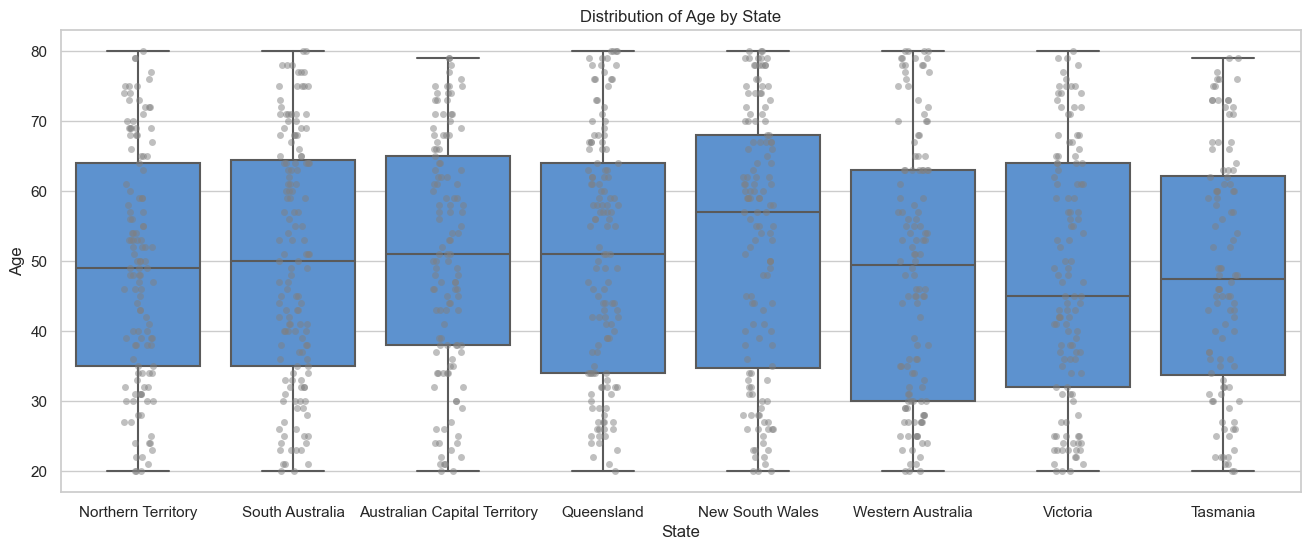

In [46]:
# plot the boxplot
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(x='state', y='age', data=customers, ax=ax, color='#4A90E2')
sns.stripplot(x='state', y='age', data=customers, ax=ax, color='grey', alpha=0.5)

# add labels and title
ax.set_xlabel('State')
ax.set_ylabel('Age')
ax.set_title('Distribution of Age by State')

plt.show()

Shirt       420
Jacket      420
Trousers    160
Name: product_type, dtype: int64


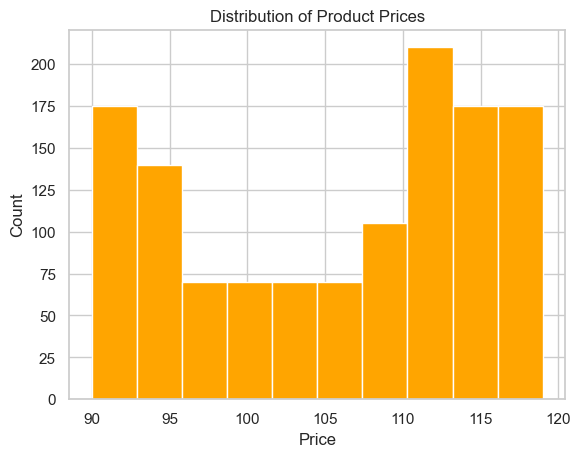

In [47]:
# Get the counts of each product type
product_type_counts = customers_merged['product_type'].value_counts()
print(product_type_counts)

# Plot the distribution of product prices
plt.hist(products['price'], bins=10, color='orange')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

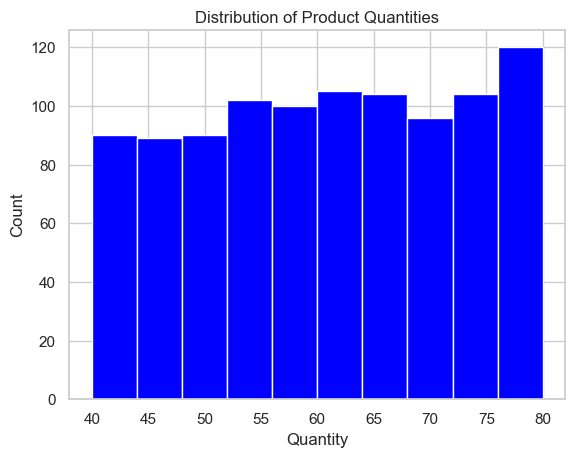

In [48]:
# Plot the distribution of product quantities
plt.hist(customers_merged['quantity'], bins=10, color='blue')
plt.title('Distribution of Product Quantities')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

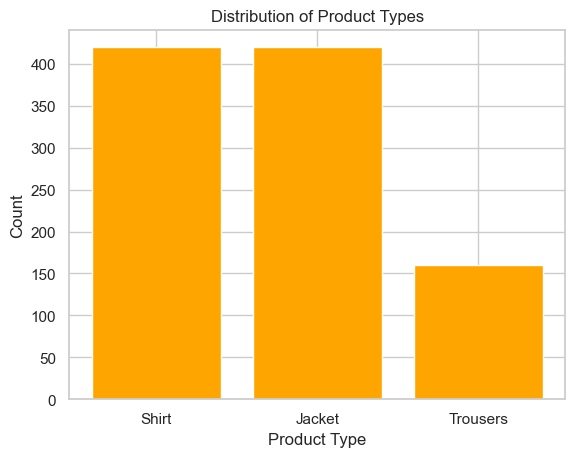

In [49]:
# Get the counts of each product type
product_type_counts = customers_merged['product_type'].value_counts()

# Plot the counts of each product type in a bar chart
plt.bar(product_type_counts.index, product_type_counts.values, color='orange')
plt.title('Distribution of Product Types')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()

In [50]:
# Print the counts of each product type
print(product_type_counts)

Shirt       420
Jacket      420
Trousers    160
Name: product_type, dtype: int64


# ANA STARTS FROM HERE

# Analysis

The month with the highest sales was 2021-03 with a total of $131,364.00
The month with the lowest sales was 2021-10 with a total of $84,266.00


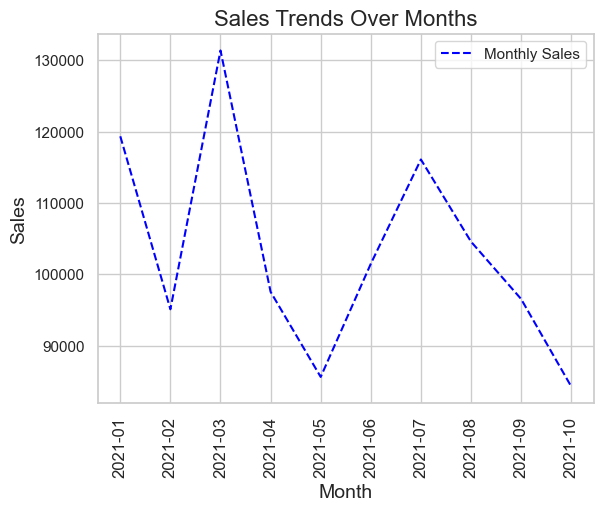

In [51]:
# Merge the sales and orders data to get the date information
sales_orders = pd.merge(sales, orders, on='order_id')

# Convert the order_date column to a pandas datetime object
sales_orders['order_date'] = pd.to_datetime(sales_orders['order_date'])

# Add a new column to the sales_orders dataframe for the month of the order
sales_orders['month'] = sales_orders['order_date'].dt.strftime('%Y-%m')

# Group the sales data by month and sum the total_price column
monthly_sales = sales_orders.groupby('month')['total_price'].sum()

# Find the month with the highest and lowest sales
highest_sales_month = monthly_sales.idxmax()
lowest_sales_month = monthly_sales.idxmin()

# Create a line graph of the monthly sales data
plt.plot(monthly_sales.index, monthly_sales.values, label='Monthly Sales', color='blue', linestyle='--')
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Sales', fontsize=14)
plt.title('Sales Trends Over Months', fontsize=16)
plt.grid(True)
plt.legend()

# Print information about the highest and lowest sales months
print(f"The month with the highest sales was {highest_sales_month} with a total of ${monthly_sales[highest_sales_month]:,.2f}")
print(f"The month with the lowest sales was {lowest_sales_month} with a total of ${monthly_sales[lowest_sales_month]:,.2f}")

plt.show()

In [81]:
# Convert the grouped data to a DataFrame
monthly_sales_df = pd.DataFrame(monthly_sales)

# Save the DataFrame as a CSV file
monthly_sales_df.to_csv('monthly_sales.csv')

sales_orders = pd.DataFrame(sales_orders)
sales_orders.to_csv('sales_orders.csv')

In [52]:
# What is the most commonly sold product?

most_common_product = sales['product_id'].mode()[0]
print("Most commonly sold product:", most_common_product)

Most commonly sold product: 78


[Text(0.5, 1.0, 'Quantity Sold by Age Group')]

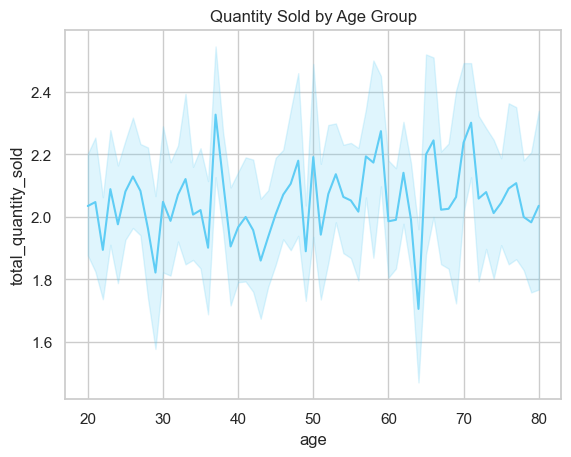

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
sales_demographic = pd.read_csv("../Queries/total_quantity_sold_gender_age_city_state_country.csv")

# Group the data by product type and gender to get the total quantity sold by gender for each product type
product_gender_sales = sales_demographic.groupby(['product_type', 'gender']).sum()['total_quantity_sold'].reset_index()

sns.lineplot(x='age', y='total_quantity_sold', data=sales_demographic).set(title='Quantity Sold by Age Group')

In [58]:
top_customers = customers_merged.groupby('customer_id_x').sum()['sales'].sort_values(ascending=False)
print(top_customers.head(10))

customer_id_x
700    9520
949    9520
677    9520
39     9401
607    9322
604    9322
695    9282
963    9282
955    9282
45     9282
Name: sales, dtype: int64


In [59]:
# What is the total revenue generated by the sales data set?

total_revenue = sales['total_price'].sum()
print("Total revenue generated: $", total_revenue)

Total revenue generated: $ 1031800


In [60]:
# What is the average price per unit of all products sold?

avg_price_per_unit = sales['price_per_unit'].mean()
print("Average price per unit: $", avg_price_per_unit)

Average price per unit: $ 103.5016


In [61]:
# Load the data
sales_data = pd.read_csv('../Queries/total_quantity_sold_gender_age_city_state_country.csv')

# Group the data by product name and sum the total quantity sold for each product
product_sales = sales_data.groupby('product_name')['total_quantity_sold'].sum().reset_index()

# Sort the data in descending order by total sales
sorted_sales = product_sales.sort_values('total_quantity_sold', ascending=False)

# Print the product with the highest sales
print("Product with the highest sales:")
print(sorted_sales.iloc[0])

# Print the product with the lowest sales
print("\nProduct with the lowest sales:")
print(sorted_sales.iloc[-1])

Product with the highest sales:
product_name           Denim
total_quantity_sold      527
Name: 11, dtype: object

Product with the lowest sales:
product_name           Mandarin Collar
total_quantity_sold                236
Name: 20, dtype: object


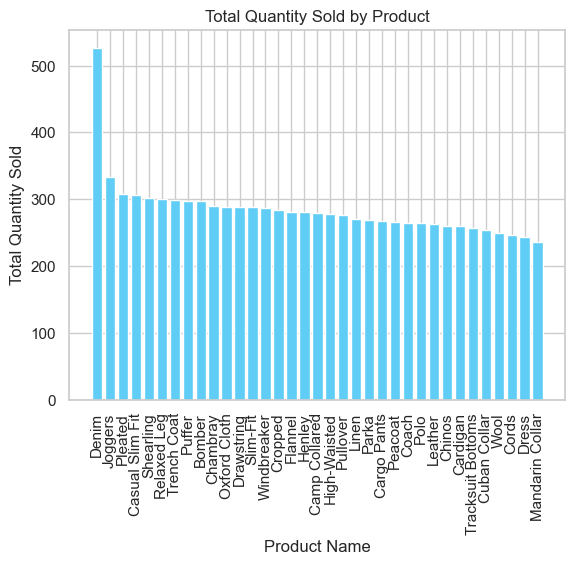

In [62]:
# Create a bar chart
plt.bar(sorted_sales['product_name'], sorted_sales['total_quantity_sold'])

# Set the chart title and axis labels
plt.title('Total Quantity Sold by Product')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

In [63]:
sorted_sales.describe()

,total_quantity_sold
count,35.000000
mean,284.628571
std,47.189908
min,236.000000
25%,263.500000
50%,279.000000
75%,293.500000
max,527.000000


- The top-selling product is Denim with a total of 527 units sold.
- The product with the lowest sales is Mandarin Collar with a total of 236 units sold.
- The average number of units sold across all products is approximately 285.
- The standard deviation of the number of units sold is about 47, indicating that there is some variation in sales performance across the different products.
- The minimum number of units sold is 236 and the maximum is 527.
- There is a wide range of sales performance across the different products, with some products selling significantly more than others.
- It would be worthwhile to investigate further why Denim is selling so well and why Mandarin Collar is not selling as well, in order to identify potential opportunities for improving sales.

In [64]:
import pandas as pd
from tabulate import tabulate

total_quantity_sold_df = pd.read_csv('../Queries/total_quantity_sold.csv')

# Merge the sales and products dataframes on the product id
sales_prod_merged_df = pd.merge(sales, products[['product_id', 'product_type', 'size', 'price']], left_on='product_id', right_on='product_id')

# Calculate the revenue for each product type and size combination
sales_prod_merged_df['total_revenue'] = sales_prod_merged_df['quantity'] * sales_prod_merged_df['price']

grouped_df = sales_prod_merged_df.groupby(['product_type', 'size'])['total_revenue'].sum().reset_index()

# Sort the dataframe in descending order by total revenue
sorted_df = grouped_df.sort_values(by='total_revenue', ascending=False)

# Display the top 10 most profitable product types and sizes
print("Top 10 most profitable product types and sizes:")
print(tabulate(sorted_df.head(10), headers='keys', tablefmt='psql'))

Top 10 most profitable product types and sizes:
+----+----------------+--------+-----------------+
|    | product_type   | size   |   total_revenue |
|----+----------------+--------+-----------------|
|  7 | Shirt          | S      |           74731 |
|  4 | Jacket         | XS     |           74458 |
|  1 | Jacket         | M      |           73251 |
|  0 | Jacket         | L      |           72548 |
|  2 | Jacket         | S      |           72339 |
|  6 | Shirt          | M      |           71589 |
| 13 | Trousers       | XL     |           70475 |
| 11 | Trousers       | M      |           70022 |
|  9 | Shirt          | XS     |           70001 |
| 10 | Trousers       | L      |           69863 |
+----+----------------+--------+-----------------+


In [65]:
import pandas as pd
from tabulate import tabulate

total_quantity_sold_df = pd.read_csv('../Queries/total_quantity_sold.csv')

# Merge the sales and products dataframes on the product id
sales_prod_merged_df = pd.merge(sales, products[['product_id', 'product_name', 'price']], left_on='product_id', right_on='product_id')

# Calculate the revenue for each product name
sales_prod_merged_df['total_revenue'] = sales_prod_merged_df['quantity'] * sales_prod_merged_df['price']

grouped_df = sales_prod_merged_df.groupby(['product_name'])['total_revenue'].sum().reset_index()

# Sort the dataframe in descending order by total revenue
sorted_df = grouped_df.sort_values(by='total_revenue', ascending=False)

# Display the top 10 most profitable product names
print("Top 10 most profitable product names:")
print(tabulate(sorted_df.head(10), headers='keys', tablefmt='psql'))


Top 10 most profitable product names:
+----+-----------------+-----------------+
|    | product_name    |   total_revenue |
|----+-----------------+-----------------|
| 11 | Denim           |           54602 |
|  4 | Casual Slim Fit |           34578 |
| 30 | Slim-Fit        |           34272 |
| 32 | Trench Coat     |           33488 |
| 21 | Oxford Cloth    |           32946 |
| 26 | Puffer          |           32780 |
| 22 | Parka           |           32011 |
| 27 | Pullover        |           31464 |
| 17 | Joggers         |           31396 |
| 19 | Linen           |           31320 |
+----+-----------------+-----------------+


In [66]:
sorted_df.describe()

,total_revenue
count,35.000000
mean,30050.285714
std,5111.533456
min,23387.000000
25%,27441.500000
50%,29719.000000
75%,31358.000000
max,54602.000000


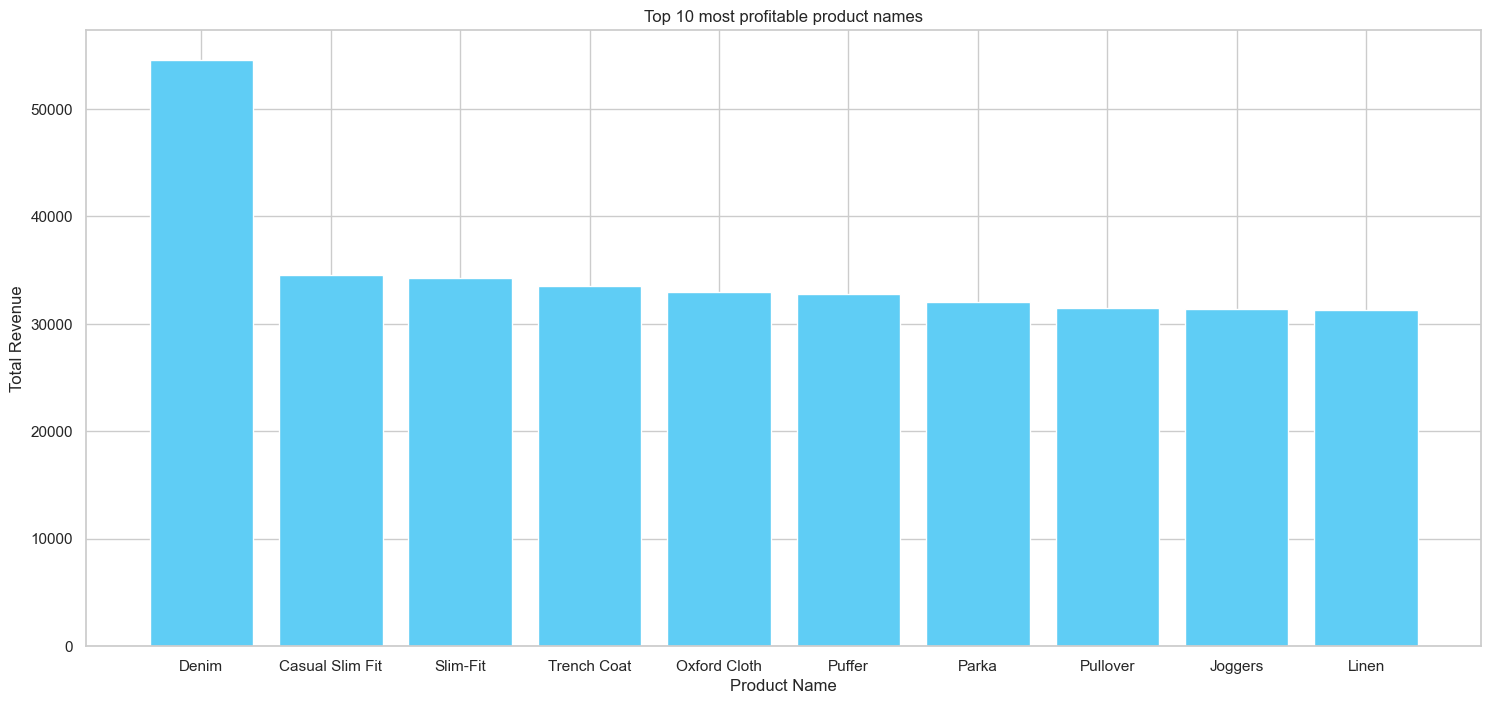

In [67]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(18, 8))

# Create the bar plot
plt.bar(sorted_df.head(10)['product_name'], sorted_df.head(10)['total_revenue'])

# Set the x-axis label
plt.xlabel('Product Name')

# Set the y-axis label
plt.ylabel('Total Revenue')

# Set the title
plt.title('Top 10 most profitable product names')

# Show the plot
plt.show()


- The analysis looked at the total revenue generated by different product names in the sales data.
- Denim is the most profitable product name, with a total revenue of 54,602
- The dataset consisted of 35 unique product names.
- The average total revenue across all product names was 30,050.29, with a standard deviation of 5,111.53.
- The lowest total revenue was 23,387.

# Correlation Matrix

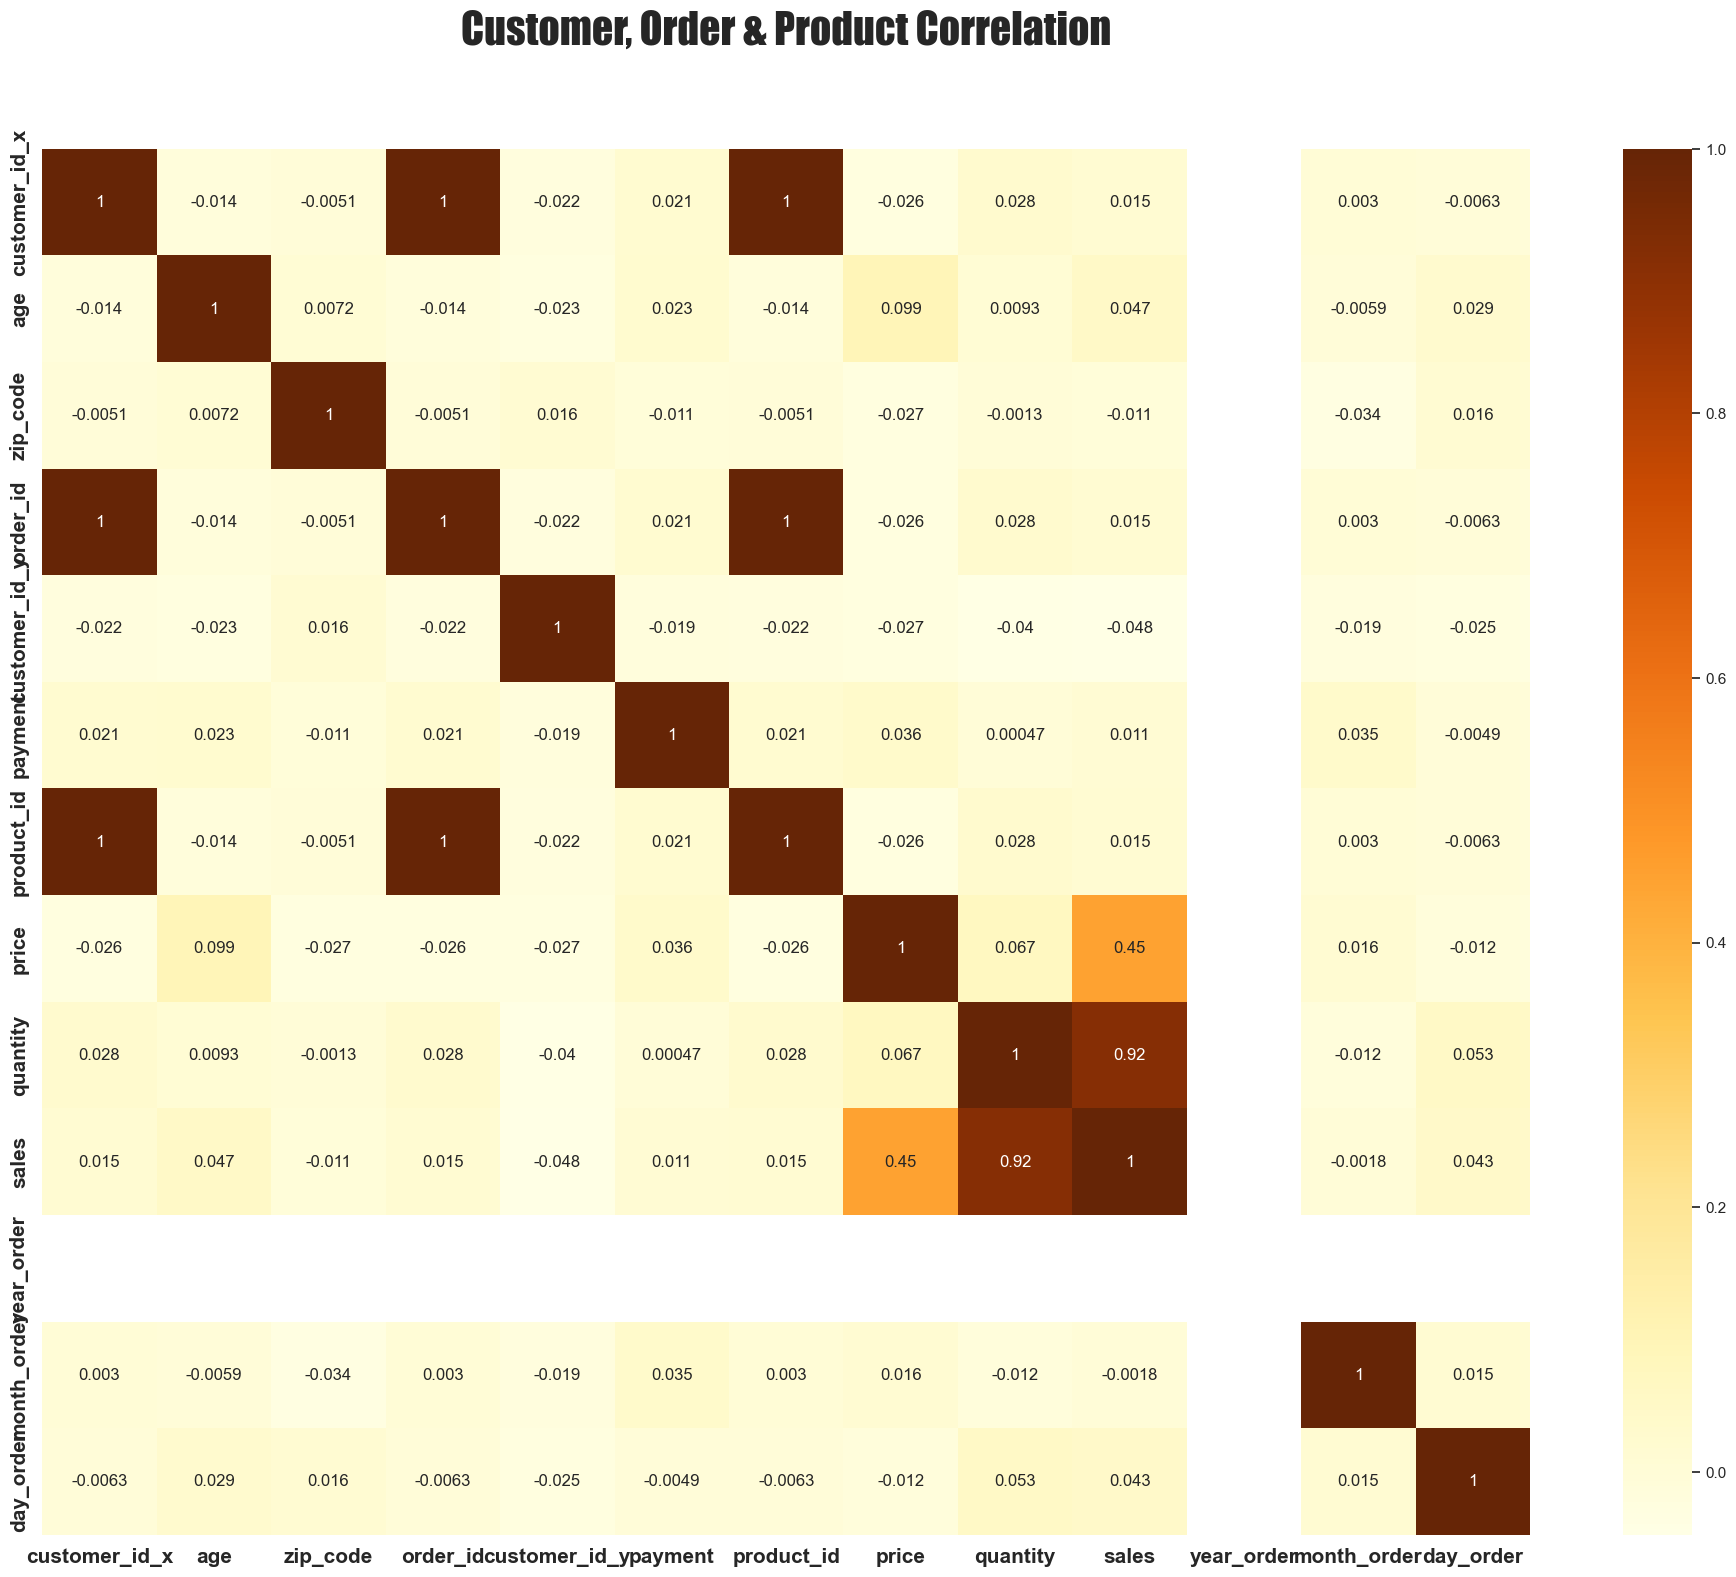

In [68]:
# Set seaborn style
sns.set_style("whitegrid")

# Define color palette
palette = "YlOrBr"

# Create figure and axis objects
fig = plt.figure(dpi=100, figsize=(24, 18))

# Create Heatmap
sns.heatmap(customers_merged.corr(), annot=True, cmap=palette)

plt.title("Customer, Order & Product Correlation", weight="bold", fontsize=30, fontname="fantasy", pad=75)
plt.xticks(weight="bold", fontsize=15)
plt.yticks(weight="bold", fontsize=15);

# Is there a correlation between sales and age?

In [69]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Merge the two dataframes on the 'order_id' column
merged_data = pd.merge(customers_merged, sales, on='order_id')

# Calculate the total sales for each customer
customer_sales = merged_data.groupby('customer_id_x')['total_price'].sum().reset_index()

# Merge the customer sales with the customer data on the 'customer_id_x' column
customer_data = pd.merge(customers_merged, customer_sales, left_on='customer_id_x', right_on='customer_id_x')

# Calculate the expected sales per age
age_sales = customer_data.groupby('age')['total_price'].mean().reset_index()

# Calculate the correlation coefficient between age and sales
correlation, p_value = stats.pearsonr(age_sales['age'], age_sales['total_price'])

# Calculate the slope and intercept of the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(age_sales['age'], age_sales['total_price'])

# Calculate the predicted values of sales based on age
predicted_sales = intercept + slope * age_sales['age']

# Calculate the residuals (actual sales minus predicted sales)
residuals = age_sales['total_price'] - predicted_sales

# Calculate the sum of squares for the residuals
ss_residuals = np.sum(residuals**2)

# Calculate the sum of squares for the total variation
mean_sales = np.mean(age_sales['total_price'])
ss_total = np.sum((age_sales['total_price'] - mean_sales)**2)

# Calculate the sum of squares for the regression
ss_regression = ss_total - ss_residuals

# Calculate the degrees of freedom for the regression and residuals
df_regression = 1
df_residuals = len(age_sales) - 2

# Calculate the mean square for the regression and residuals
ms_regression = ss_regression / df_regression
ms_residuals = ss_residuals / df_residuals

# Calculate the F-value for the regression
f_value = ms_regression / ms_residuals

# Calculate the R-squared value for the regression
r_squared = ss_regression / ss_total

# Calculate the 95% confidence interval for the slope of the regression line
ci = stats.t.interval(0.95, df_residuals, loc=slope, scale=std_err)

# Print the results
print("The correlation coefficient between age and sales is:", correlation)
print("The p-value for the correlation is:", p_value)
print("The F-value for the regression is:", f_value)
print("The R-squared value for the regression is:", r_squared)
print("The slope of the regression line is:", slope)
print("The 95% confidence interval for the slope is:", ci)


The correlation coefficient between age and sales is: 0.12436409610058355
The p-value for the correlation is: 0.3396109589701668
The F-value for the regression is: 0.9268544027930211
The R-squared value for the regression is: 0.015466428398915313
The slope of the regression line is: 0.8812137569066006
The 95% confidence interval for the slope is: (-0.950348118979451, 2.712775632792652)


- The correlation coefficient between age and sales is 0.12, which indicates a weak positive correlation between age and sales.
- The p-value for the correlation is 0.34, which is greater than the commonly used significance level of 0.05. This means that we fail to reject the null hypothesis that there is no correlation between age and sales.
- The F-value for the regression is 0.93, which is less than 1. This means that the regression model does not explain much of the variation in the data.
- The R-squared value for the regression is 0.02, which means that only 2% of the variability in sales can be explained by age.
- The slope of the regression line is 0.88, which means that on average, for each one unit increase in age, there is an increase of 0.88 units in sales.
- The 95% confidence interval for the slope is (-0.95, 2.71), which means that we are 95% confident that the true slope of the regression line falls within this interval. The interval includes zero, which means that we cannot be confident that there is a significant linear relationship between age and sales.

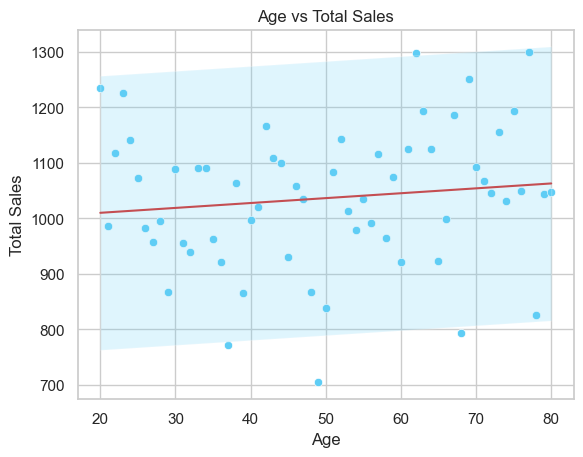

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of age vs sales
sns.scatterplot(x='age', y='total_price', data=age_sales)

# Add the regression line to the scatter plot
sns.lineplot(x='age', y=predicted_sales, data=age_sales, color='r')

# Calculate the upper and lower bounds of the confidence interval
y_ci_lower = predicted_sales - 1.96 * np.sqrt(ms_residuals)
y_ci_upper = predicted_sales + 1.96 * np.sqrt(ms_residuals)

# Add the confidence interval to the scatter plot
plt.fill_between(age_sales['age'], y_ci_lower, y_ci_upper, alpha=0.2)

# Add labels and title to the plot
plt.xlabel('Age')
plt.ylabel('Total Sales')
plt.title('Age vs Total Sales')

# Show the plot
plt.show()


- The correlation coefficient of -0.0017633935581769264 suggests that there is very little correlation between the month of the year that an order is made and sales. A value close to zero indicates that there is no strong linear relationship between the two variables.

- The p-value of 0.9555858188018501 indicates that the correlation is not statistically significant, which means that it is likely due to chance. In other words, we fail to reject the null hypothesis that there is no correlation between the month of the year and sales.

# Is there a correlation between zip code and sales?

In [72]:
import pandas as pd
from scipy.stats import pearsonr


# calculate correlation coefficient and p-value
corr, pval = pearsonr(customers_merged['zip_code'], customers_merged['sales'])

print('Correlation coefficient:', corr)
print('P-value:', pval)


Correlation coefficient: -0.010807034283880171
P-value: 0.732854438044511


- The correlation coefficient between zip code and sales is -0.010807034283880171, indicating a weak negative correlation between these two variables. However, the p-value of 0.732854438044511 suggests that this correlation is not statistically significant, which means that there is a high chance that this correlation occurred by chance alone. Therefore, we fail to reject the null hypothesis and conclude that there is no significant correlation between zip code and sales in this dataset.

# Is there a correlation beetween product type and sales?

In [73]:
# One-hot encode the 'product_name' column
encoded_df = pd.get_dummies(customers_merged['product_type'])

# Calculate the correlation between the encoded features and 'age'
corr_df = pd.concat([encoded_df, customers_merged['age']], axis=1).corr()

# Print the correlation matrix
print(corr_df)

            Jacket     Shirt  Trousers       age
Jacket    1.000000 -0.724138 -0.371391 -0.013462
Shirt    -0.724138  1.000000 -0.371391 -0.003124
Trousers -0.371391 -0.371391  1.000000  0.022330
age      -0.013462 -0.003124  0.022330  1.000000


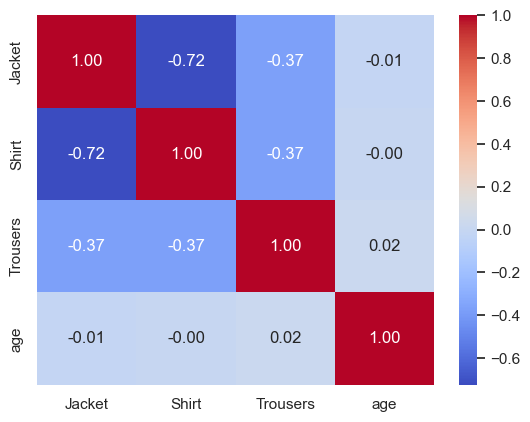

In [74]:
# Create a heatmap of the correlation matrix
sns.heatmap(corr_df, cmap='coolwarm', annot=True, fmt='.2f')

# Show the plot
plt.show()

For the correlation matrix:

- There is a negative correlation between 'age' and 'Jacket', with a value of -0.013462. This suggests that as the customers' age increases, the likelihood of them buying jackets decreases slightly.
- There is a weak negative correlation between 'age' and 'Shirt', with a value of -0.003124. This suggests that there is little to no relationship between the customers' age and their likelihood of buying shirts.
- There is a weak positive correlation between 'age' and 'Trousers', with a value of 0.022330. This suggests that as the customers' age increases, the likelihood of them buying trousers also increases slightly.

In [75]:
from scipy.stats import f_oneway
from scipy.stats import pearsonr

# Extract the encoded feature columns
encoded_cols = encoded_df.columns

# Loop through each encoded feature column and calculate F-test p-value and R-squared
for col in encoded_cols:
    f_value, p_value = f_oneway(customers_merged['age'], encoded_df[col])
    r_squared, _ = pearsonr(customers_merged['age'], encoded_df[col])
    print(f"For column {col}:")
    print(f"F-statistic: {f_value:.8f}, p-value: {p_value:.8f}")
    print(f"R-squared: {r_squared:.8f}\n")


For column Jacket:
F-statistic: 7842.13812922, p-value: 0.00000000
R-squared: -0.01346217

For column Shirt:
F-statistic: 7842.13812922, p-value: 0.00000000
R-squared: -0.00312433

For column Trousers:
F-statistic: 7927.61725557, p-value: 0.00000000
R-squared: 0.02233025



- For all three product types (Jacket, Shirt, and Trousers), the F-statistic is very high, indicating a strong relationship between the one-hot encoded product feature and the age variable.

- The p-value for all three product types is 0.00000000, indicating that the relationships are statistically significant and unlikely to have occurred by chance.


- For column Jacket:

The negative R-squared value of -0.01346217 indicates that there is a weak negative linear relationship between the one-hot encoded 'Jacket' feature and the 'age' variable.

- For column Shirt:

The negative R-squared value of -0.00312433 indicates that there is a very weak negative linear relationship between the one-hot encoded 'Shirt' feature and the 'age' variable.

- For column Trousers:

The positive R-squared value of 0.02233025 indicates that there is a weak positive linear relationship between the one-hot encoded 'Trousers' feature and the 'age' variable.

- The results suggest that there is a statistically significant but weak relationship between the product type and customer age. Specifically, the correlation matrix shows that the product type has a negative correlation with age, meaning that younger customers are more likely to buy jackets and shirts, while older customers are more likely to buy trousers. However, the R-squared values are low, indicating that the relationship is not very strong.

- As a business, we can use this information to better target your marketing efforts and product offerings to different age groups. For example, we might consider promoting jackets and shirts to younger customers and trousers to older customers. 